In [1]:
import sys # modules in sys.path directories's are all available for import
sys.path.append('./DevelopedMethods')
# from imports import * # import np, pd, sklearn fn's
from DF import * # import np, pd, sklearn fn's --and df (https://www.kaggle.com/datasets/kartik2112/fraud-detection/)
import explore # import our exploratory "Developed Methods"

In [2]:
df.head(1) # check it out

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
# make exploration easier, drop redundant columns:
df.drop(['Unnamed: 0', 'unix_time', 'trans_num'], axis = 1, inplace = True) # "Unnamed: 0" always == row index  &  "unix_time" isn't as readable as "trans_date_trans_time", "trans_num" is unique in every row (basically an id, so useless)

In [5]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

In [6]:
df.head(1) # check it out again

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0


# Explore Data - For Further Feature Selection

In [8]:
# df = df["gender"].apply(lambda x: 1 if x == "M" else 0)
fraud = df[df['is_fraud'] > 0]
legit = df[df['is_fraud'] == 0]
print("legit:", len(legit), ", fraud:", len(fraud))

legit: 1289169 , fraud: 7506


In [9]:
import seaborn as sns

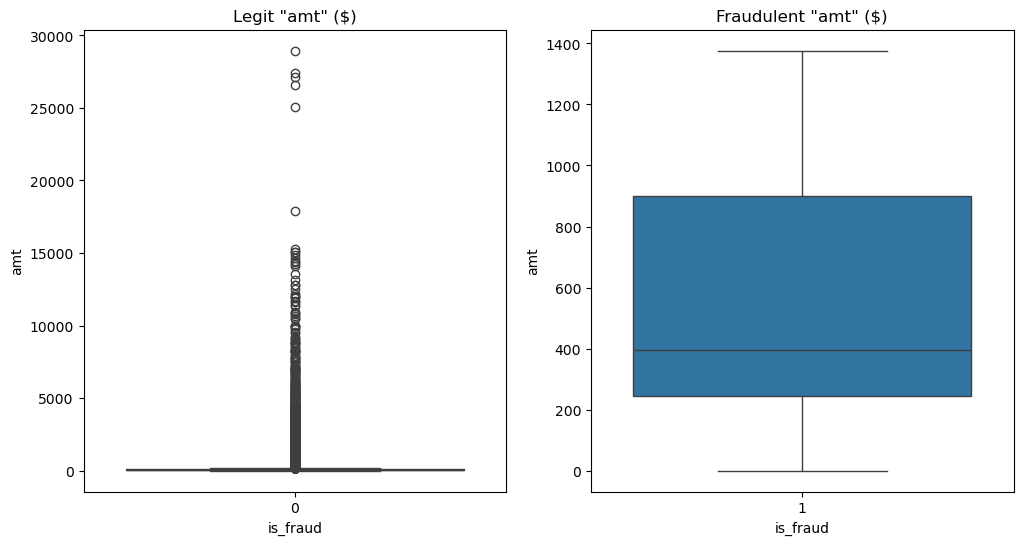

In [10]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1x2 plot (rowsxcolumns), 12x6 inches... fig = canvas (or container), axes = subplots

# First boxplot - Legit "amt" ($) by Fraud Status
sns.boxplot(x='is_fraud', y='amt', data=legit, ax=axes[0])
axes[0].set_title('Legit "amt" ($)')

# Second boxplot - Fraudulent Transaction "amt"
sns.boxplot(x='is_fraud', y='amt', data=fraud, ax=axes[1])
axes[1].set_title('Fraudulent "amt" ($)')

plt.show()

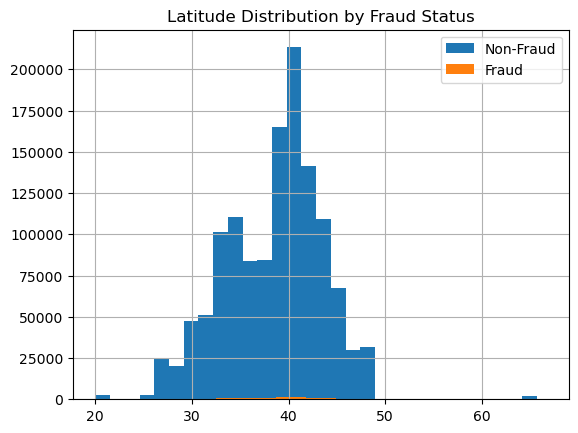

In [11]:
#  For continuous features like lat and long, histograms can show the distribution of transaction locations.
df[df['is_fraud'] == 0]['lat'].hist(alpha=1, label='Non-Fraud', bins=30)
df[df['is_fraud'] == 1]['lat'].hist(alpha=1, label='Fraud', bins=30)
plt.legend()
plt.title('Latitude Distribution by Fraud Status')
plt.show()

[(0, 'trans_date_trans_time'), (1, 'cc_num'), (2, 'merchant'), (3, 'category'), (4, 'amt'), (5, 'first'), (6, 'last'), (7, 'gender'), (8, 'street'), (9, 'city'), (10, 'state'), (11, 'zip'), (12, 'lat'), (13, 'long'), (14, 'city_pop'), (15, 'job'), (16, 'dob'), (17, 'merch_lat'), (18, 'merch_long'), (19, 'is_fraud')]


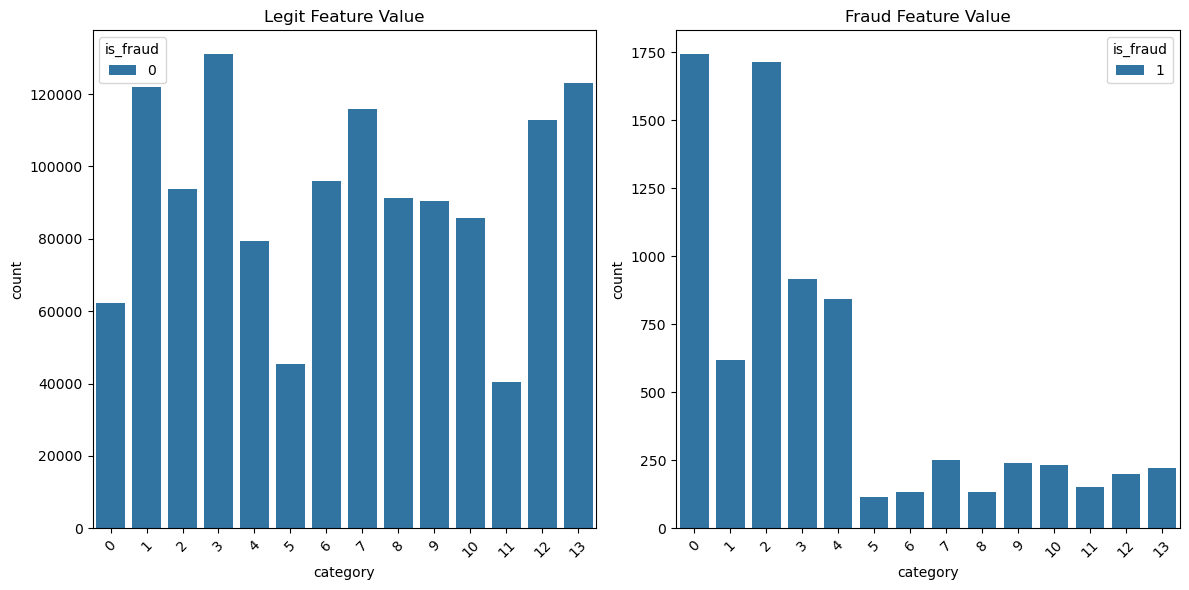

In [12]:
print(list(enumerate(df.columns))) # make easy to see feature index/name pair

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot - Legit "amt" ($) by Fraud Status
sns.countplot(x='category', hue='is_fraud', data=legit, ax=axes[0])
axes[0].set_title('Legit Feature Value')
axes[0].set_xticks(range(len(axes[0].get_xticks())))  # Ensure ticks are set before labeling
axes[0].set_xticklabels([str(i) for i in range(len(axes[0].get_xticks()))], rotation=45)

# Second plot - Fraudulent Transaction "amt"
sns.countplot(x='category', hue='is_fraud', data=fraud, ax=axes[1])
axes[1].set_title('Fraud Feature Value')
axes[1].set_xticks(range(len(axes[1].get_xticks())))  # Ensure ticks are set before labeling
axes[1].set_xticklabels([str(i) for i in range(len(axes[1].get_xticks()))], rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

# seems like 0 (trans_date_trans_time) can imply fraud
# seems like 2 (merchant)              can slightly imply fraud

# seems like 1 (cc_num), 3 (category), 5-13 (category, amt, first, last, gender, street, city, state, zip, lat, long)
#                                      can imply legit
# seems like 4 (amt)                   can very slightly imply legit


In [13]:
df.corr() # try and see which feature 

ValueError: could not convert string to float: '2019-01-01 00:00:18'

# One-hot encoding (dummy features), Normalize data if needed
# Check if imbalanced (more non-fraud than fraud cases or vice-versa); if imbalanced: “SMOTE” or “undersampling” can balance classes
# Column value uniqueness; checking for correlations & how features relate to each other
